In [18]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv('generated_GPT4o_Naples_v1.csv', sep=';', encoding='utf-8')
df
df = df.drop_duplicates(subset='title', keep='first')
df

ParserError: Error tokenizing data. C error: Expected 11 fields in line 5, saw 12


In [122]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()
try:
    df = df.drop(['Column1'], axis=1)
except:
    pass


df['occupancy'] = df['occupancy'].replace('sin límite', -1)
df['capacity'] = df['occupancy']

df = df.drop(['occupancy'], axis=1)


small_spaces = ['Floristería', 'Dulce', 'FIWARE', 'Farmacia', 'Joyería', 'Kiosco', 'Kiosko', 'Bake', 'Pastelería', 'Churrería', 
                'Helad', 'Peluquería', 'Quesería']
medium_spaces = ['Azotea', 'Cathedral', 'Catedral', 'Casa', 'Cafetería', 'Discoteca', 'Iglesia', 'Teatro', 'Theatre', 'Gimnasio', 'Librería',
                 'Consulado', 'Comisaría', 'Tasca', 'Restaurant', 'Pub', 'Bar', 'Mirador', 'Tienda', 'Juguetería', 'Local']
big_spaces = ['Acuario', 'Biblioteca', 'Basílica', 'Caixa', 'Comercial', 'Centro', 'Cine', 'Estadio', 'Edificio', 'Fábrica',
               'Museo', 'Teatro', 'Edificio', 'Estación', 'Galería', 'Hotel', 'Instituto', 'Mercado', 'Palacio', 'Parque', 'Universidad',
               'zoo', 'Hospital', 'Hostal', 'Colegio', 'Jardín', 'Jardin', 'Lago', 'Playa', 'Monumento', 'Torre', 'Templo', 'Vía']

no_limit = ['Avenida', 'Calle', 'Street', 'Barrio', 'Bulevar', 'Carretera', 'Autovía', 'Autopista', 'Rotonda', 'Municipio', 'Zona']

no_limit_oc = 99999999999999999

for space in no_limit:
    df.loc[df['title'].str.contains(space, case=False), 'capacity'] = no_limit_oc
    df.loc[df['description'].str.contains(space, case=False), 'capacity'] = no_limit_oc

for space in big_spaces:
    df.loc[df['title'].str.contains(space, case=False), 'capacity'] = np.random.randint(1000, 2000)
    df.loc[df['description'].str.contains(space, case=False), 'capacity'] = np.random.randint(1000, 2000)

for space in medium_spaces:
    df.loc[df['title'].str.contains(space, case=False), 'capacity'] = np.random.randint(300, 800)
    df.loc[df['description'].str.contains(space, case=False), 'capacity'] = np.random.randint(300, 800)

for space in small_spaces:
    df.loc[df['title'].str.contains(space, case=False), 'capacity'] = np.random.randint(30, 80)
    df.loc[df['description'].str.contains(space, case=False), 'capacity'] = np.random.randint(30, 80)


df['capacity'] = df['capacity'].astype(int)

df['occupancy'] = df['capacity'].apply(lambda x: np.random.randint(0, x))

df.loc[df['capacity'] == no_limit_oc, 'occupancy'] = np.random.randint(5000, 100000)

df.loc[df['price'].str.contains('gratis', case=False), 'price'] = '0€'
df.loc[df['price'].str.contains('variable', case=False), 'price'] = '5€'


df['id'] = 'urn:ngsi-ld:PoI:' + df.index.astype(str)

df[df['capacity'] == -1]

,id,type,title,relevance,image,location_type,coordinates,price,description,capacity,occupancy


In [123]:
df[df['image'].notna()]

,id,type,title,relevance,image,location_type,coordinates,price,description,capacity,occupancy
5,urn:ngsi-ld:PoI:5,PoI,Museo del Prado,1,mdprado.jpeg,Point,"-3.692127,40.41378",15€,El Museo del Prado es el museo más importante ...,1171,870
78,urn:ngsi-ld:PoI:78,PoI,Plaza de Cibeles,2,cibeles.jpeg,Point,"-3.693461,40.419561",0€,La Plaza de Cibeles es una de las plazas más e...,1563,857
92,urn:ngsi-ld:PoI:92,PoI,Puerta del Sol,1,sol.jpg,Point,"-3.703834,40.416947",0€,La Puerta del Sol es una de las plazas más fam...,99999999999999999,29708
176,urn:ngsi-ld:PoI:176,PoI,Santiago Bernabéu,2,bernabeu.webp,Point,"-3.688344,40.453054",25€,El estadio Santiago Bernabéu es el hogar del R...,1158,724
208,urn:ngsi-ld:PoI:208,PoI,Calle de Alcalá,2,Calle_Alcala.jpg,Point,"-3.682319,40.420986",0€,La Calle de Alcalá es una de las principales a...,656,168
232,urn:ngsi-ld:PoI:232,PoI,Templo de Debod,2,debod.jpg,Point,"-3.720457,40.424033",0€,El Templo de Debod es un antiguo templo egipci...,1537,1536
382,urn:ngsi-ld:PoI:382,PoI,Palacio de Cibeles,2,Museo_Thyssen-Bornemisza.jpeg,Point,"-3.693908,40.419553",2€,"El Palacio de Cibeles, antiguamente conocido c...",524,76
458,urn:ngsi-ld:PoI:458,PoI,Museo Reina Sofía,1,museo_reina_sofia.jpg,Point,"-3.694159,40.408665",10€,El Museo Reina Sofía es el principal museo de ...,1171,187
462,urn:ngsi-ld:PoI:462,PoI,Puerta de Alcalá,2,Puerta_de_Alcala_05.jpg,Point,"-3.688917,40.419561",0€,La Puerta de Alcalá es uno de los monumentos m...,1374,472
500,urn:ngsi-ld:PoI:500,PoI,Museo Thyssen-Bornemisza,1,Museo_Thyssen-Bornemisza.jpeg,Point,"-3.69425,40.416873",13€,El Museo Thyssen-Bornemisza alberga una de las...,1171,517


In [124]:
df.head()

,id,type,title,relevance,image,location_type,coordinates,price,description,capacity,occupancy
0,urn:ngsi-ld:PoI:0,PoI,Pastelería Celia,4,NaN,Point,"-3.708912,40.419877",0€,"Pastelería en el barrio de Chueca, conocida po...",66,30
1,urn:ngsi-ld:PoI:1,PoI,Dama de Baza,3,NaN,Point,"-3.695370,40.410897",0€,Escultura íbera ubicada en el Museo Arqueológi...,1171,1068
2,urn:ngsi-ld:PoI:2,PoI,Avenida de Andalucía,5,NaN,Point,"-3.692827,40.417684",0€,Vía importante que conecta con diferentes zona...,1968,506
3,urn:ngsi-ld:PoI:3,PoI,Restaurante La Oveja Negra,3,NaN,Point,"-3.711142,40.418345",0€,"Restaurante en el barrio de Chamartín, conocid...",578,399
4,urn:ngsi-ld:PoI:4,PoI,Hospital Santa Cristina,3,NaN,Point,"-3.706879,40.426560",0€,"Hospital de mediana complejidad, conocido por ...",1679,1212


<Axes: >

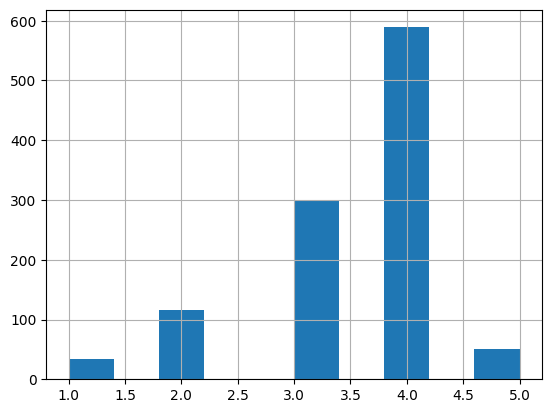

In [125]:
df['relevance'].hist()

In [126]:
df.to_csv('generated_GPT4o_Madrid_v3.csv', sep=',', index=False)